# Definição da Qualidade de Vinhos - Analisando comportamento de Modelos utilizando diferentes algoritmos de ML

### Realizando a importação das bibliotecas que serão utilizadas no projeto.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

### Importando dados do dataset que serão utilizados para a análise e classificação da qualidade dos vinhos.

In [2]:
raw_data = pd.read_csv('../../DatasetsKaggle/winequality-red.csv')
raw_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

### Para facilitar o entendimento final é feito a renomeação das colunas para o idioma português.

In [3]:
rename_columns = {'fixed acidity':'Acidez_Fixa','volatile acidity':'Acidez_Volatil','citric acid':'Acido_Citrico','residual sugar':'Acucar_Residual','chlorides':'Cloretos',
                  'free sulfur dioxide':'Dioxido_de_Enxofre_Livre','total sulfur dioxide':'Total_Dioxido_de_Enxofre','density':'Densidade','sulphates':'Sulfatos','alcohol':'Alcool',
                  'quality':'Qualidade'
                 }

raw_data.rename(columns = rename_columns, inplace = True)

### Analisando as características das variáveis presentes no dataset.

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Acidez_Fixa               1599 non-null   float64
 1   Acidez_Volatil            1599 non-null   float64
 2   Acido_Citrico             1599 non-null   float64
 3   Acucar_Residual           1599 non-null   float64
 4   Cloretos                  1599 non-null   float64
 5   Dioxido_de_Enxofre_Livre  1599 non-null   float64
 6   Total_Dioxido_de_Enxofre  1599 non-null   float64
 7   Densidade                 1599 non-null   float64
 8   pH                        1599 non-null   float64
 9   Sulfatos                  1599 non-null   float64
 10  Alcool                    1599 non-null   float64
 11  Qualidade                 1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Não é verificado nenhum valor nulo presente no dataset, dessa forma sem a necessidade de um tratamento para compor alguma valor faltante.

### Iniciando a analise exploratoria dos dados pela visualização geral dos valores estatisticos básicos das variáveis.

In [5]:
raw_data.describe()

Acidez_Fixa  Acidez_Volatil  Acido_Citrico  Acucar_Residual  \
count  1599.000000     1599.000000    1599.000000      1599.000000   
mean      8.319637        0.527821       0.270976         2.538806   
std       1.741096        0.179060       0.194801         1.409928   
min       4.600000        0.120000       0.000000         0.900000   
25%       7.100000        0.390000       0.090000         1.900000   
50%       7.900000        0.520000       0.260000         2.200000   
75%       9.200000        0.640000       0.420000         2.600000   
max      15.900000        1.580000       1.000000        15.500000   

          Cloretos  Dioxido_de_Enxofre_Livre  Total_Dioxido_de_Enxofre  \
count  1599.000000               1599.000000               1599.000000   
mean      0.087467                 15.874922                 46.467792   
std       0.047065                 10.460157                 32.895324   
min       0.012000                  1.000000                  6.000000   
25%       0.070000                  7.000000                 22.000000   
50%       0.079000                 14.000000                 38.000000   
75%       0.090000                 21.000000                 62.000000   
max       0.611000                 72.000000                289.000000   

         Densidade           pH     Sulfatos       Alcool    Qualidade  
count  1599.000000  1599.000000  1599.000000  1599.000000  1599.000000  
mean      0.996747     3.311113     0.658149    10.422983     5.636023  
std       0.001887     0.154386     0.169507     1.065668     0.807569  
min       0.990070     2.740000     0.330000     8.400000     3.000000  
25%       0.995600     3.210000     0.550000     9.500000     5.000000  
50%       0.996750     3.310000     0.620000    10.200000     6.000000  
75%       0.997835     3.400000     0.730000    11.100000     6.000000  
max       1.003690     4.010000     2.000000    14.900000     8.000000

### Plotandos graficos boxplots para verificar o comportamento da distribuição e a presença de possíveis outliers nos dados.

<AxesSubplot:xlabel='Dioxido_de_Enxofre_Livre'>

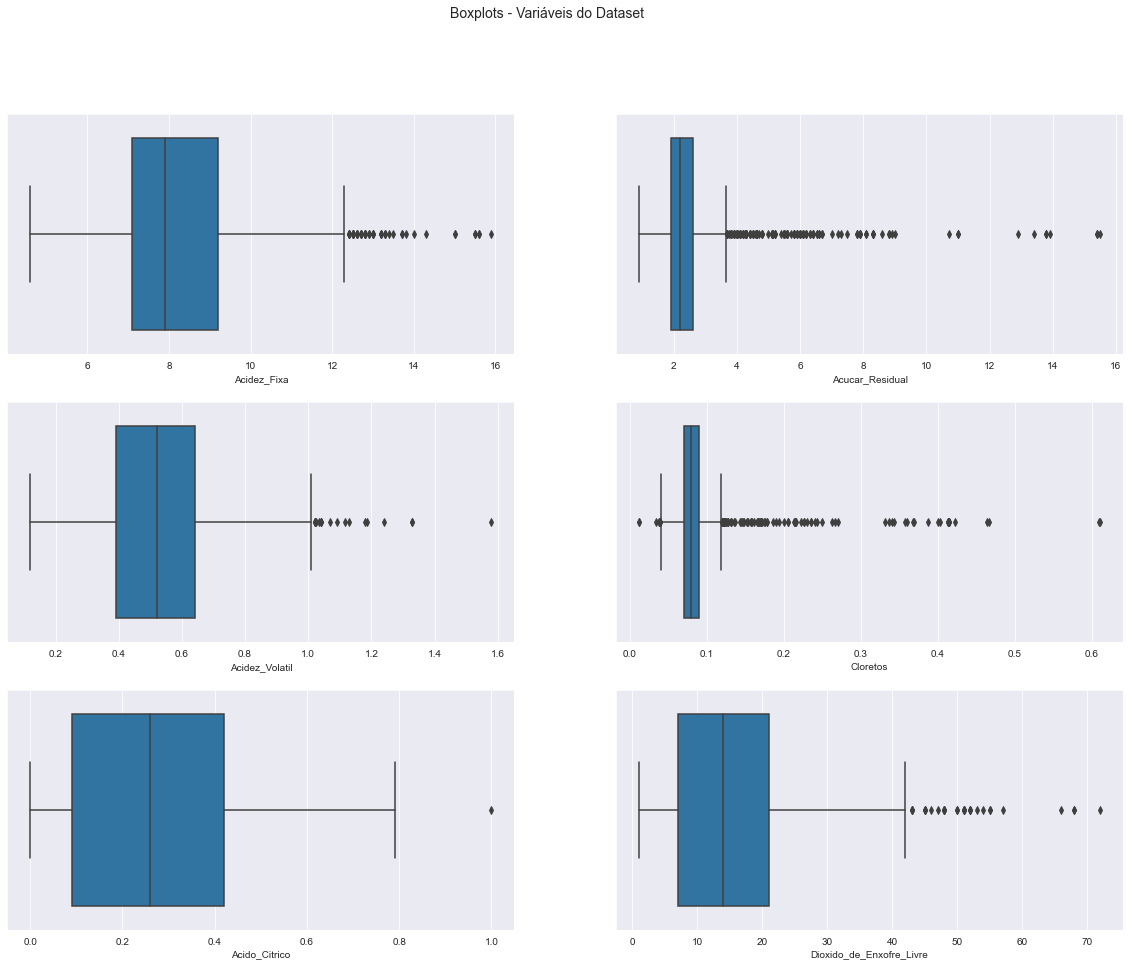

In [6]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(3,2, figsize = (20,15), sharey = True)
fig.suptitle('Boxplots - Variáveis do Dataset', fontsize = 14)

sns.boxplot(ax = axes[0,0], x = raw_data['Acidez_Fixa'])

sns.boxplot(ax = axes[1,0], x = raw_data['Acidez_Volatil'])

sns.boxplot(ax = axes[2,0], x = raw_data['Acido_Citrico'])

sns.boxplot(ax = axes[0,1], x = raw_data['Acucar_Residual'])

sns.boxplot(ax = axes[1,1], x = raw_data['Cloretos'])

sns.boxplot(ax = axes[2,1], x = raw_data['Dioxido_de_Enxofre_Livre'])


<AxesSubplot:xlabel='Qualidade'>

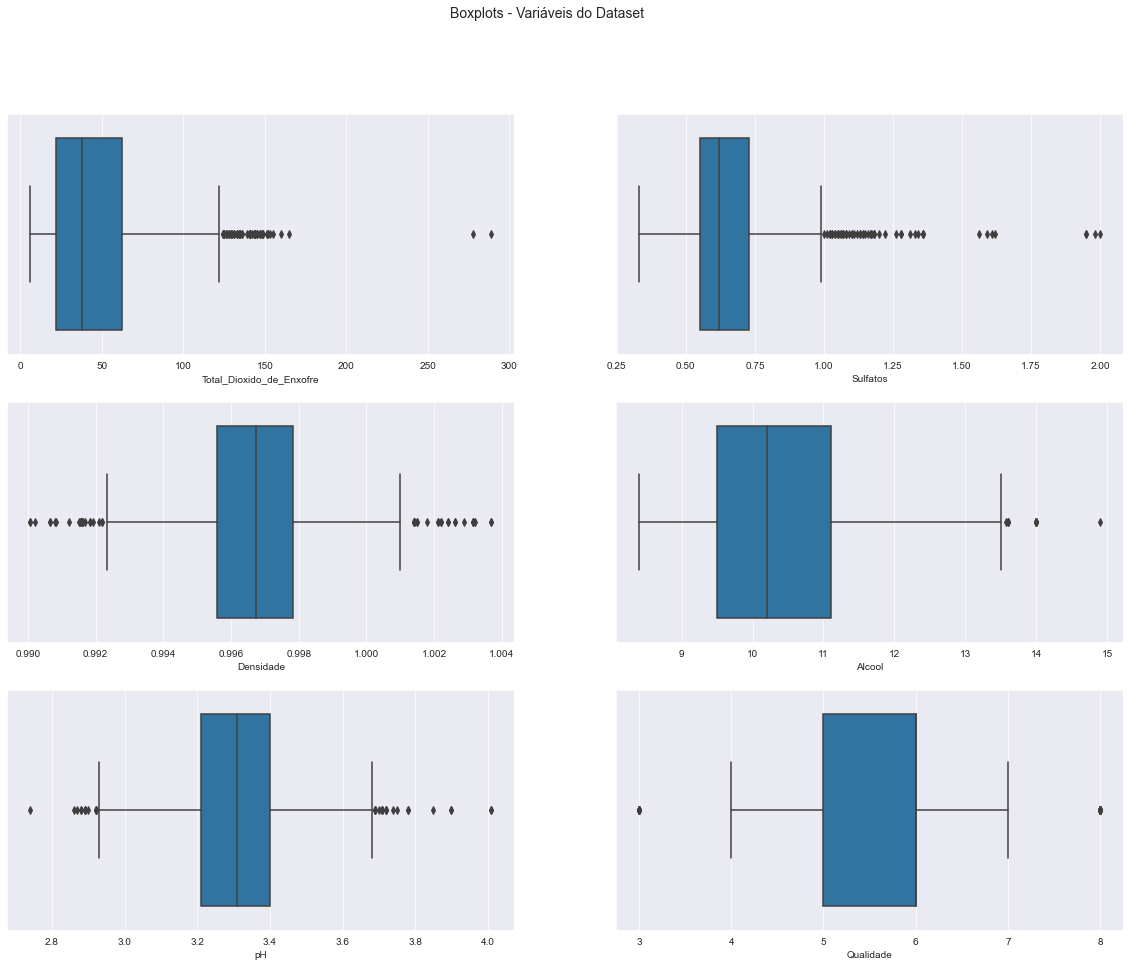

In [7]:
sns.set_style('darkgrid')
fig2, axes = plt.subplots(3,2, figsize = (20,15), sharey = True)
fig2.suptitle('Boxplots - Variáveis do Dataset', fontsize = 14)

sns.boxplot(ax = axes[0,0], x = raw_data['Total_Dioxido_de_Enxofre'])

sns.boxplot(ax = axes[1,0], x = raw_data['Densidade'])

sns.boxplot(ax = axes[2,0], x = raw_data['pH'])

sns.boxplot(ax = axes[0,1], x = raw_data['Sulfatos'])

sns.boxplot(ax = axes[1,1], x = raw_data['Alcool'])

sns.boxplot(ax = axes[2,1], x = raw_data['Qualidade'])

### Analisando detalhadamente as variáveis do dataset que apresentaram uma quantidade considerável de outliers, buscando enteder o comportamento e o impacto dos mesmos para o futuro modelo.

Text(0, 0.5, 'Quantidade de Vinhos')

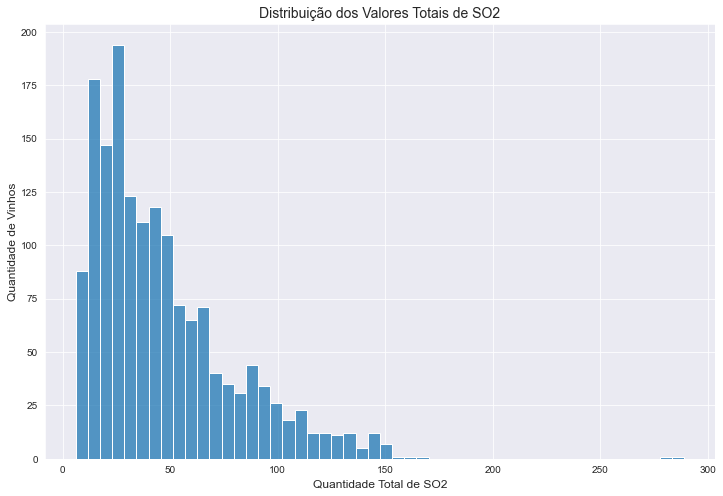

In [8]:
plt.subplots(figsize = (12,8))
grafico3 = sns.histplot(x = 'Total_Dioxido_de_Enxofre', data = raw_data, bins = 50)
grafico3.set_title('Distribuição dos Valores Totais de SO2', fontsize = 14)
grafico3.set_xlabel('Quantidade Total de SO2', fontsize = 12)
grafico3.set_ylabel('Quantidade de Vinhos', fontsize = 12)


Text(0.5, 1.0, 'Total Dioxido de Enxofre')

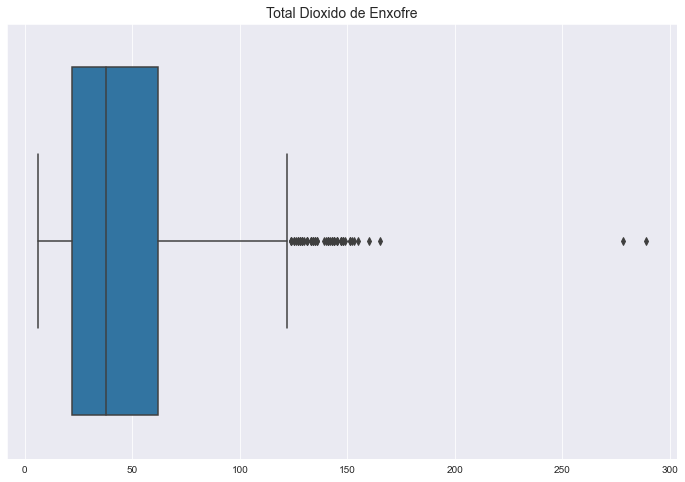

In [9]:
plt.figure(figsize=(12,8))
grafico = sns.boxplot(x = raw_data['Total_Dioxido_de_Enxofre'])
grafico.set(xlabel = None)
grafico.set_title('Total Dioxido de Enxofre', fontsize = 14)

In [10]:
raw_data.query('Total_Dioxido_de_Enxofre > 150')

Acidez_Fixa  Acidez_Volatil  Acido_Citrico  Acucar_Residual  Cloretos  \
109           8.1           0.785           0.52              2.0     0.122   
354           6.1           0.210           0.40              1.4     0.066   
515           8.5           0.655           0.49              6.1     0.122   
651           9.8           0.880           0.25              2.5     0.104   
672           9.8           1.240           0.34              2.0     0.079   
684           9.8           0.980           0.32              2.3     0.078   
1079          7.9           0.300           0.68              8.3     0.050   
1081          7.9           0.300           0.68              8.3     0.050   
1244          5.9           0.290           0.25             13.4     0.067   

      Dioxido_de_Enxofre_Livre  Total_Dioxido_de_Enxofre  Densidade    pH  \
109                       37.0                     153.0    0.99690  3.21   
354                       40.5                     165.0    0.99120  3.25   
515                       34.0                     151.0    1.00100  3.31   
651                       35.0                     155.0    1.00100  3.41   
672                       32.0                     151.0    0.99800  3.15   
684                       35.0                     152.0    0.99800  3.25   
1079                      37.5                     278.0    0.99316  3.01   
1081                      37.5                     289.0    0.99316  3.01   
1244                      72.0                     160.0    0.99721  3.33   

      Sulfatos  Alcool  Qualidade  
109       0.69     9.3          5  
354       0.59    11.9          6  
515       1.14     9.3          5  
651       0.67    11.2          5  
672       0.53     9.5          5  
684       0.48     9.4          5  
1079      0.51    12.3          7  
1081      0.51    12.3          7  
1244      0.54    10.3          6

### Como observado pela distribuição dos valores do total de dioxido de enxofre presente no vinho, além dos maiores valores que esta variável assume, os mesmos estão dentro de um valor aceitavel (350mg/L) para os parâmetros dos vinhos tintos consumidos no Brasil. Dessa forma é possível observar que os dados de fato devem permancer para o modelo a ser desenvolvido.

### Verificando o comportamento da variavel - Álcool.

Text(0, 0.5, 'Quantidade de Vinhos')

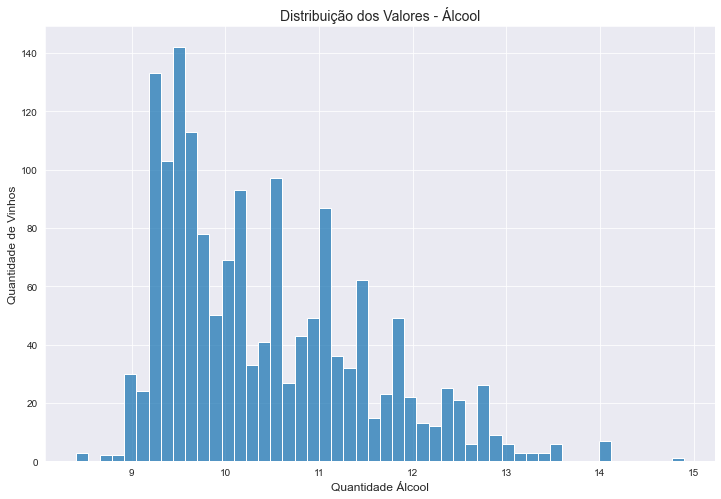

In [11]:
plt.subplots(figsize = (12,8))
grafico3 = sns.histplot(x = 'Alcool', data = raw_data, bins = 50)
grafico3.set_title('Distribuição dos Valores - Álcool', fontsize = 14)
grafico3.set_xlabel('Quantidade Álcool', fontsize = 12)
grafico3.set_ylabel('Quantidade de Vinhos', fontsize = 12)

Text(0.5, 1.0, 'Boxplot dos valores - Álcool')

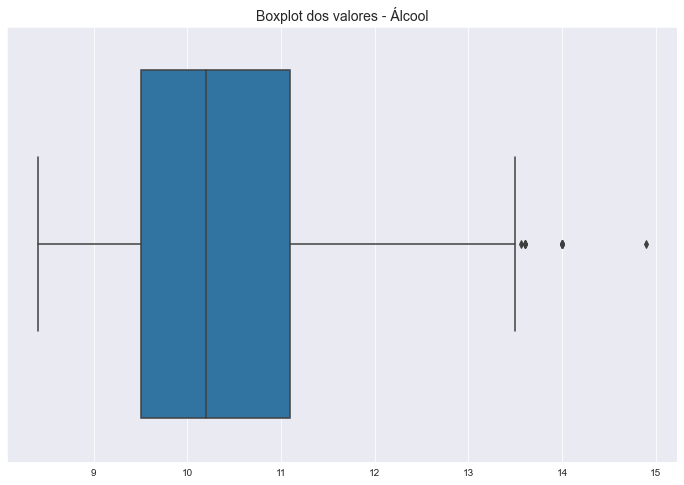

In [12]:
plt.figure(figsize=(12,8))
grafico2 = sns.boxplot(x = raw_data['Alcool'])
grafico2.set(xlabel = None)
grafico2.set_title('Boxplot dos valores - Álcool', fontsize = 14)

### Identificando a quantidade de valores outliers presentes na coluna Alcool, utilizando como referência o valor do limite superior observardo no boxplot plotado.

In [13]:
raw_data.query('Alcool > 13.5').shape[0]

13

In [14]:
raw_data.query('Alcool > 13.5')

Acidez_Fixa  Acidez_Volatil  Acido_Citrico  Acucar_Residual  Cloretos  \
142           5.2            0.34           0.00              1.8     0.050   
144           5.2            0.34           0.00              1.8     0.050   
467           8.8            0.46           0.45              2.6     0.065   
588           5.0            0.42           0.24              2.0     0.060   
652          15.9            0.36           0.65              7.5     0.096   
821           4.9            0.42           0.00              2.1     0.048   
1114          5.0            0.40           0.50              4.3     0.046   
1132          7.4            0.36           0.34              1.8     0.075   
1228          5.1            0.42           0.00              1.8     0.044   
1269          5.5            0.49           0.03              1.8     0.044   
1270          5.0            0.38           0.01              1.6     0.048   
1475          5.3            0.47           0.11              2.2     0.048   
1477          5.3            0.47           0.11              2.2     0.048   

      Dioxido_de_Enxofre_Livre  Total_Dioxido_de_Enxofre  Densidade    pH  \
142                       27.0                      63.0    0.99160  3.68   
144                       27.0                      63.0    0.99160  3.68   
467                        7.0                      18.0    0.99470  3.32   
588                       19.0                      50.0    0.99170  3.72   
652                       22.0                      71.0    0.99760  2.98   
821                       16.0                      42.0    0.99154  3.71   
1114                      29.0                      80.0    0.99020  3.49   
1132                      18.0                      38.0    0.99330  3.38   
1228                      18.0                      88.0    0.99157  3.68   
1269                      28.0                      87.0    0.99080  3.50   
1270                      26.0                      60.0    0.99084  3.70   
1475                      16.0                      89.0    0.99182  3.54   
1477                      16.0                      89.0    0.99182  3.54   

      Sulfatos     Alcool  Qualidade  
142       0.79  14.000000          6  
144       0.79  14.000000          6  
467       0.79  14.000000          6  
588       0.74  14.000000          8  
652       0.84  14.900000          5  
821       0.74  14.000000          7  
1114      0.66  13.600000          6  
1132      0.88  13.600000          7  
1228      0.73  13.600000          7  
1269      0.82  14.000000          8  
1270      0.75  14.000000          6  
1475      0.88  13.566667          7  
1477      0.88  13.600000          7

### De maneira similiar como observado na variavel SO2, os valores observados como outliers no dataset para a variavel Alcool, são valores que fazem parte e pertence ao contexto de vinho mais alcoólicos. Dessa forma os mesmos devem permanecer para compor o modelo.

### Analisando a correlação entre as variáveis do dataset.

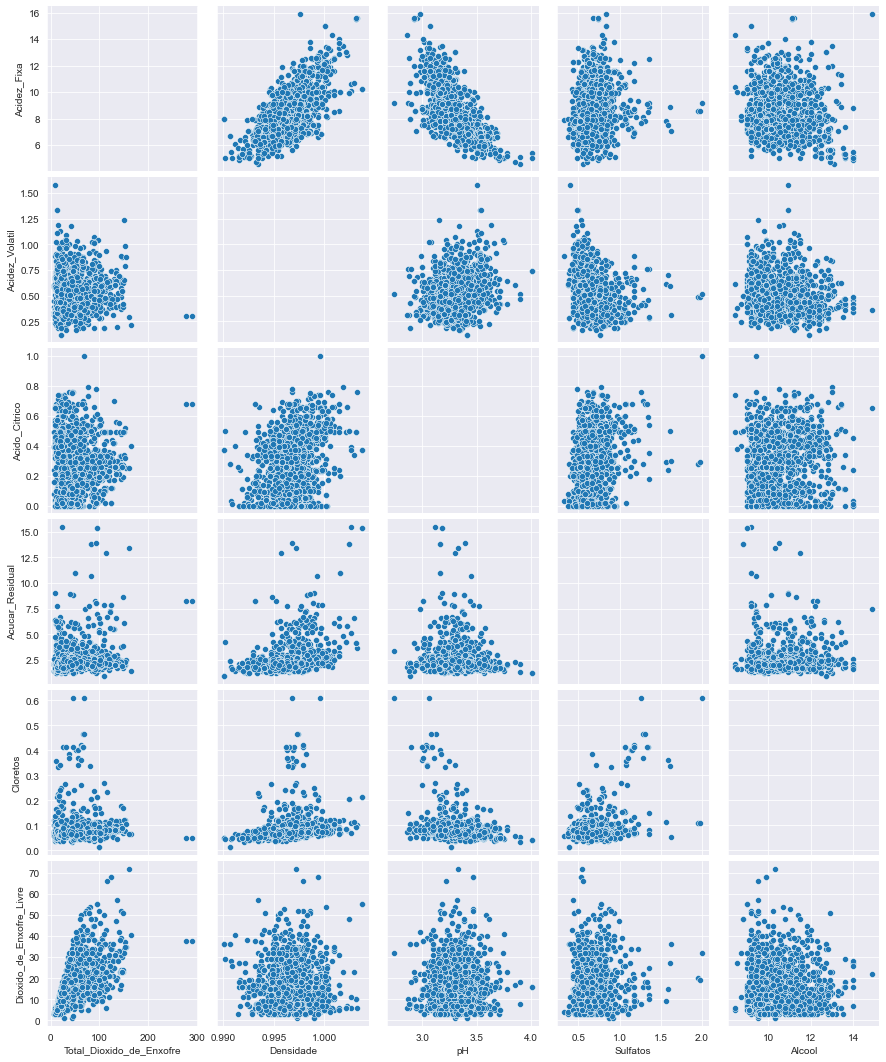

In [15]:
grafico3 = sns.pairplot(data = raw_data, x_vars = ['Total_Dioxido_de_Enxofre','Densidade','pH','Sulfatos','Alcool'],
                        y_vars = ['Acidez_Fixa','Acidez_Volatil','Acido_Citrico','Acucar_Residual','Cloretos','Dioxido_de_Enxofre_Livre'])

### Avaliando a correlação existente entre os dados utilizando heatmap.

Text(0.5, 1.0, 'Heatmap - Correlação entre Variáveis do Dataset')

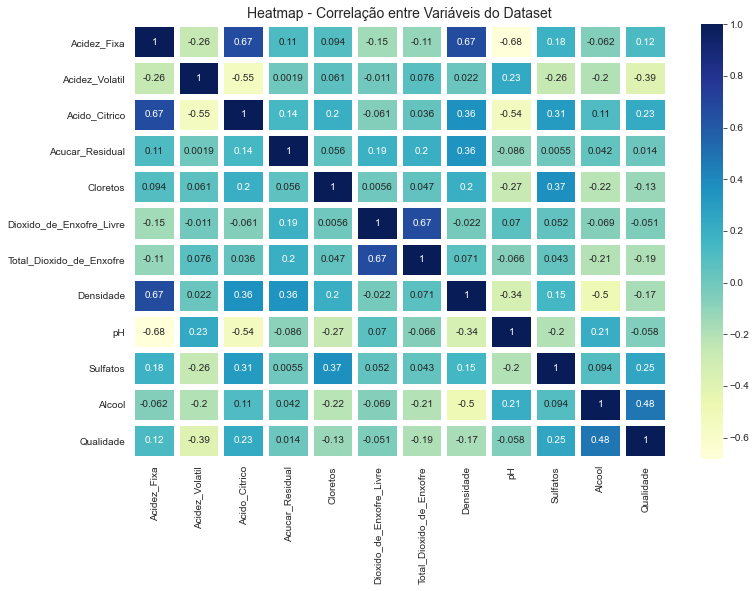

In [16]:
plt.figure(figsize = (12,8))
grafico4 = sns.heatmap(raw_data.corr(), linewidths = 5, cmap = 'YlGnBu', annot = True)
grafico4.set_title('Heatmap - Correlação entre Variáveis do Dataset', fontsize = 14)

### Criando as categorias de classificação dos Vinhos.

In [17]:
raw_data.Qualidade.unique()
# 3 - 5 ruim  
# 6 - 8 bom

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [18]:
valor_minimo = raw_data.Qualidade.min()
valor_maximo = raw_data.Qualidade.max()

rotulos = ['Ruim','Bom']
classes = [valor_minimo,5.9,valor_maximo]

raw_data['Classe_Vinho'] = pd.cut(raw_data.Qualidade, bins = classes, labels = rotulos, include_lowest = True)


In [19]:
raw_data[raw_data['Qualidade'] == 7]

Acidez_Fixa  Acidez_Volatil  Acido_Citrico  Acucar_Residual  Cloretos  \
7             7.3            0.65           0.00              1.2     0.065   
8             7.8            0.58           0.02              2.0     0.073   
16            8.5            0.28           0.56              1.8     0.092   
37            8.1            0.38           0.28              2.1     0.066   
62            7.5            0.52           0.16              1.9     0.085   
...           ...             ...            ...              ...       ...   
1534          6.6            0.56           0.14              2.4     0.064   
1541          7.4            0.25           0.29              2.2     0.054   
1544          8.4            0.37           0.43              2.3     0.063   
1555          7.0            0.56           0.17              1.7     0.065   
1584          6.7            0.32           0.44              2.4     0.061   

      Dioxido_de_Enxofre_Livre  Total_Dioxido_de_Enxofre  Densidade    pH  \
7                         15.0                      21.0    0.99460  3.39   
8                          9.0                      18.0    0.99680  3.36   
16                        35.0                     103.0    0.99690  3.30   
37                        13.0                      30.0    0.99680  3.23   
62                        12.0                      35.0    0.99680  3.38   
...                        ...                       ...        ...   ...   
1534                      13.0                      29.0    0.99397  3.42   
1541                      19.0                      49.0    0.99666  3.40   
1544                      12.0                      19.0    0.99550  3.17   
1555                      15.0                      24.0    0.99514  3.44   
1584                      24.0                      34.0    0.99484  3.29   

      Sulfatos  Alcool  Qualidade Classe_Vinho  
7         0.47   10.00          7          Bom  
8         0.57    9.50          7          Bom  
16        0.75   10.50          7          Bom  
37        0.73    9.70          7          Bom  
62        0.62    9.50          7          Bom  
...        ...     ...        ...          ...  
1534      0.62   11.70          7          Bom  
1541      0.76   10.90          7          Bom  
1544      0.81   11.20          7          Bom  
1555      0.68   10.55          7          Bom  
1584      0.80   11.60          7          Bom  

[199 rows x 13 columns]

In [20]:
binario = {'Bom':1,'Ruim':0}
raw_data['Classe_Vinho_Num'] = raw_data['Classe_Vinho'].map(binario)

In [21]:
raw_data['Classe_Vinho'].value_counts()

Bom     855
Ruim    744
Name: Classe_Vinho, dtype: int64

### No dataset constam 855 vinhos classificados como Bom, 744 classificados como ruins.

## Iniciando as classificações dos dados, avaliando o comportamento de cada um dos modelos de Machine Learning utilizados para a definição da qualidade dos Vinhos.

In [22]:
X = np.array(raw_data[['Total_Dioxido_de_Enxofre','Densidade','pH','Sulfatos','Alcool','Acidez_Fixa','Acidez_Volatil','Acido_Citrico','Acucar_Residual','Cloretos','Dioxido_de_Enxofre_Livre']])
y = np.array(raw_data['Classe_Vinho_Num'])

### Primeiro algoritmo -- K-Neighbors Classifier

In [23]:
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 500)
modelo = neighbors.KNeighborsClassifier()
modelo.fit(X_train,y_train)

KNeighborsClassifier()

In [58]:
accuracy = modelo.score(X_test,y_test)
print(f'A acurácia do modelo é de {round((accuracy*100),2)}%')

A acurácia do modelo é de 67.5%


### Rescalando as variaveis e utilizando novamente o modelo.

In [26]:
from sklearn.preprocessing import MinMaxScaler  

data_scaled = raw_data

scaler = MinMaxScaler()
scaler.fit(data_scaled[['Total_Dioxido_de_Enxofre','Densidade','pH','Sulfatos','Alcool','Acidez_Fixa','Acidez_Volatil','Acido_Citrico','Acucar_Residual','Cloretos','Dioxido_de_Enxofre_Livre']])

data_scaled[['Total_Dioxido_de_Enxofre','Densidade','pH','Sulfatos','Alcool','Acidez_Fixa','Acidez_Volatil','Acido_Citrico','Acucar_Residual','Cloretos','Dioxido_de_Enxofre_Livre']] = scaler.transform(
    data_scaled[['Total_Dioxido_de_Enxofre','Densidade','pH','Sulfatos','Alcool','Acidez_Fixa','Acidez_Volatil','Acido_Citrico','Acucar_Residual','Cloretos','Dioxido_de_Enxofre_Livre']])

In [27]:
X1 = np.array(data_scaled[['Total_Dioxido_de_Enxofre','Densidade','pH','Sulfatos','Alcool','Acidez_Fixa','Acidez_Volatil','Acido_Citrico','Acucar_Residual','Cloretos','Dioxido_de_Enxofre_Livre']])
y1 = np.array(data_scaled['Classe_Vinho_Num'])

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 500)
modelo = neighbors.KNeighborsClassifier()
modelo.fit(X_train,y_train)

KNeighborsClassifier()

In [56]:
accuracy_new = modelo.score(X_test,y_test)
print(f'A acurácia do modelo é de {accuracy_new*100}%')

A acurácia do modelo é de 71.25%


### Segundo Algoritmo -- Support Vector Machine - SVM

In [61]:
from sklearn import svm
from sklearn.metrics import accuracy_score 

modelo_svm = svm.SVC()
modelo_svm.fit(X_train,y_train)

modelo_svm_predicts = modelo_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test,modelo_svm_predicts)

print(f'A acurácia do modelo é de {accuracy_svm*100}%')

A acurácia do modelo é de 61.5625%


### Terceiro Algoritmo -- Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

modelo_rfc = RandomForestClassifier(n_estimators= 200)

modelo_rfc.fit(X_train,y_train)
modelo_rfc_predict = rfc.predict(X_test)

print(classification_report(y_test, modelo_rfc_predict))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       154
           1       0.81      0.89      0.85       166

    accuracy                           0.83       320
   macro avg       0.84      0.83      0.83       320
weighted avg       0.84      0.83      0.83       320



### Dessa forma é possivel verificar a melhor modelagem realizada atraves da utilização do algoritmo Random Forest Classifier, sendo ainda possivel atraves dos hiperparametros buscar potencializar o resultado da acuracia do modelo proposto.